In [2]:
!pip install -q --upgrade keras-cv
#!pip install -q --upgrade keras  # Upgrade to Keras 3.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 17.6 MB/s eta 0:00:00


In [3]:
import time
import keras_cv
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [4]:
# Set back to the default for benchmarking purposes.
#keras.mixed_precision.set_global_policy("float32")

# Let's make sure to warm up the model
keras.mixed_precision.set_global_policy("mixed_float16")

model = keras_cv.models.StableDiffusion(jit_compile=True)#, img_height=256, img_width=256)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [5]:
benchmark_result = []
start = time.time()
#
images = model.text_to_image(
    "car volkswagen",
    #"flower",
    batch_size=1,
)
end = time.time()
benchmark_result.append(["XLA + Mixed Precision", end - start])
print(f"XLA + mixed precision: {(end - start):.2f} seconds")

198180272/198180272 [==============================] - 1s 0us/step
XLA + mixed precision: 4807.97 seconds


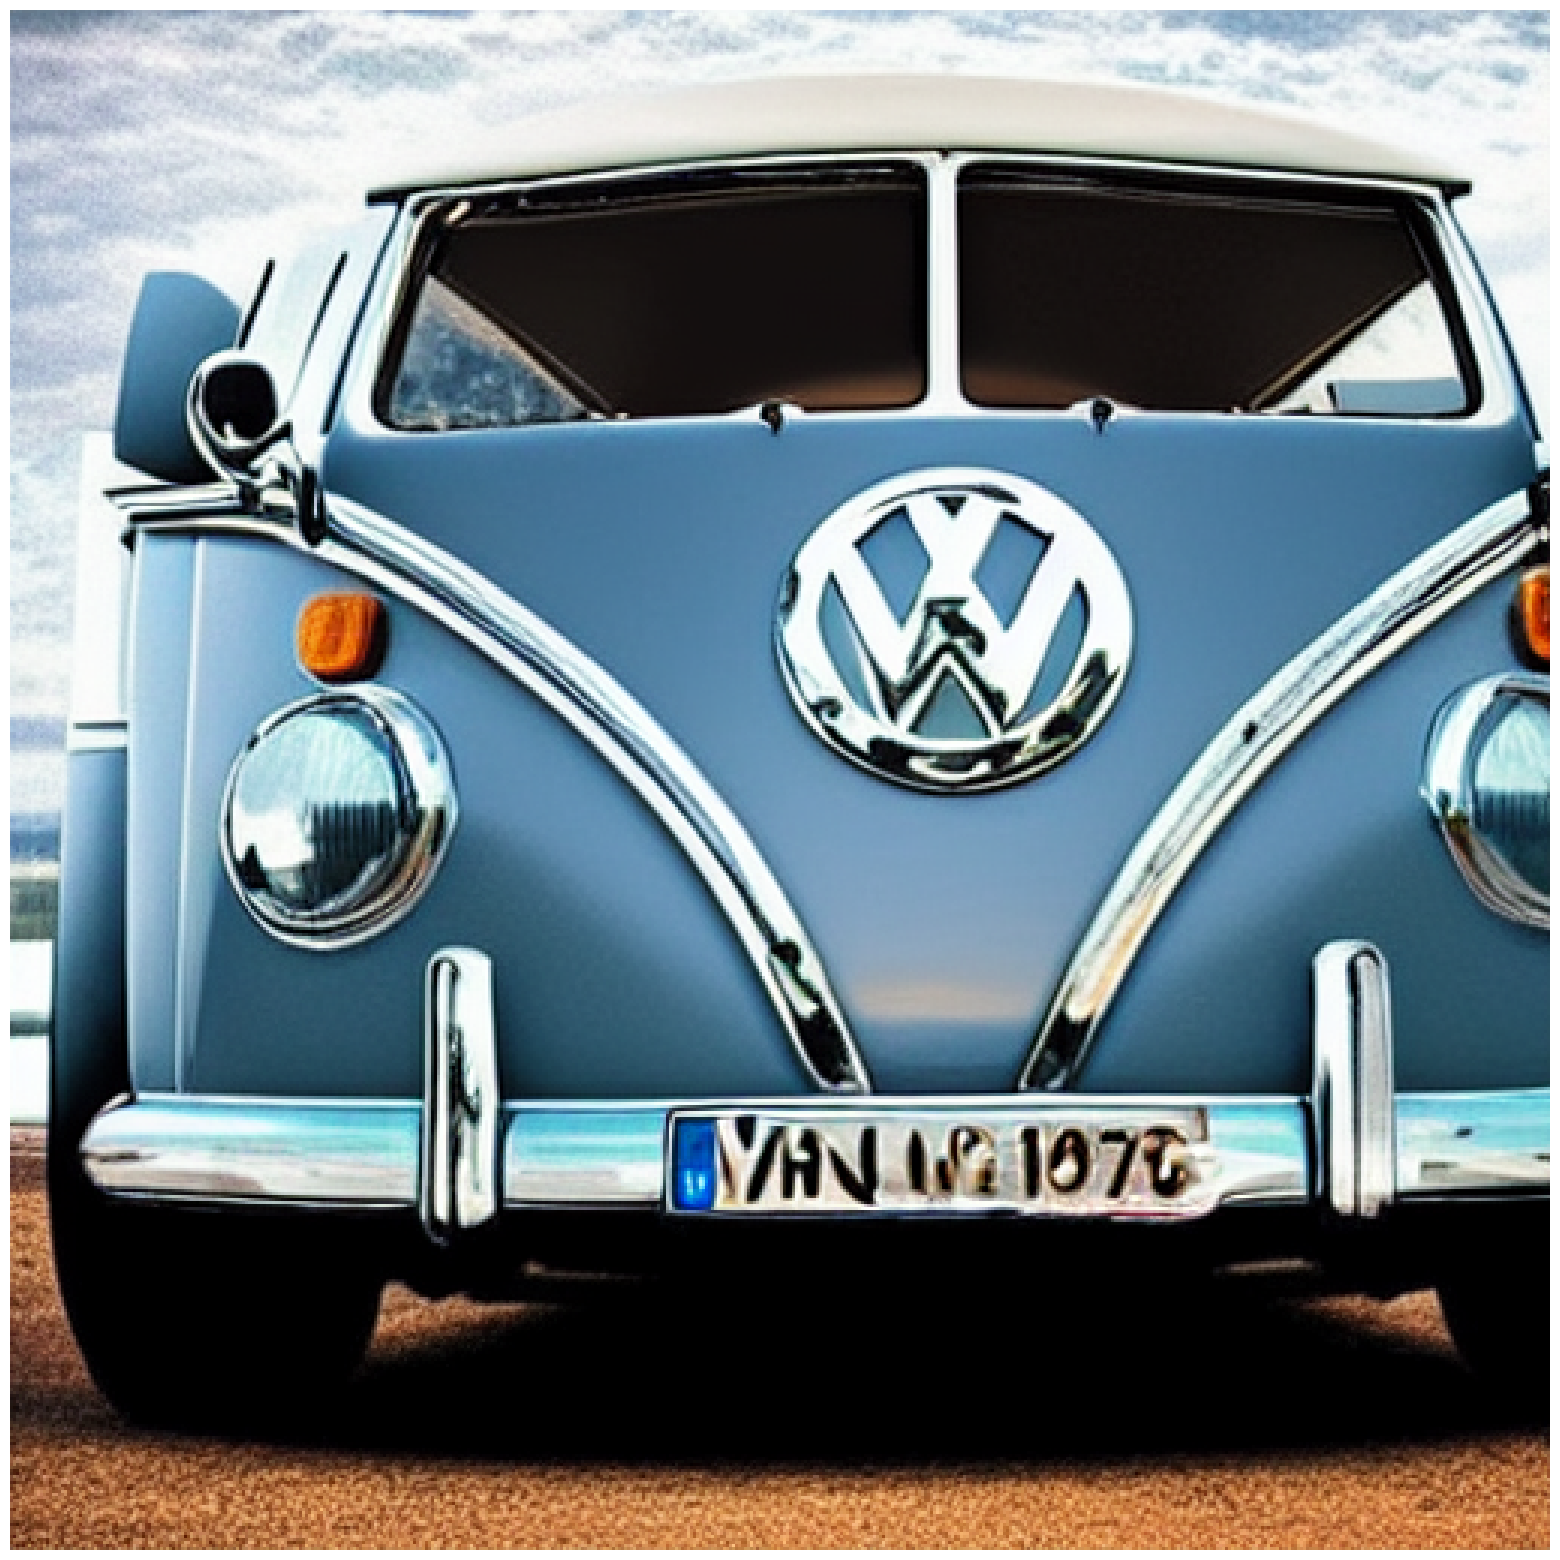

In [6]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

plot_images(images)